# Week 3 Part 2 Solutions

In [1]:
#%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import rebound
import time
import numpy as np

In [74]:
def simulate(tend, plot_res_angle = False):
    Noutputs = 1000
    times = np.linspace(0, tend, Noutputs)
    a1 = np.zeros(Noutputs)
    a2 = np.zeros(Noutputs)
    e1 = np.zeros(Noutputs)
    e2 = np.zeros(Noutputs)
    l1 = np.zeros(Noutputs)
    l2 = np.zeros(Noutputs)
    pomega1 = np.zeros(Noutputs)
    pomega2 = np.zeros(Noutputs)

    P2 = sim.orbits()[1].P
    P1 = sim.orbits()[0].P
    print("Initial period ratio = ", P2/P1)
    
    for i,t in enumerate(times):
        sim.integrate(t, exact_finish_time=1)
        a1[i] = sim.orbits()[0].a
        e1[i] = sim.orbits()[0].e
        a2[i] = sim.orbits()[1].a
        e2[i] = sim.orbits()[1].e
        l1[i] = sim.orbits()[0].l # mean longitude
        l2[i] = sim.orbits()[1].l
        pomega1[i] = sim.orbits()[0].pomega # longitude of pericentre
        pomega2[i] = sim.orbits()[1].pomega
    
    fig = plt.figure(figsize=(4,6))

    gs = GridSpec(nrows=6, ncols=1, height_ratios=[2, 1, 1, 1, 1, 1], hspace=0.05)

    axes = []
    for i in range(5):
        ax = fig.add_subplot(gs[i, 0], sharex=axes[0] if axes else None)
        axes.append(ax)

    l1d = np.rad2deg(l1)-180
    l2d = np.rad2deg(l2)-180
    # insert nan's at jumps in angle, a hack to remove discontinuities in the plot
    jumps = np.abs(np.diff(l1d)) > 180
    l1d[1:][jumps] = np.nan
    jumps = np.abs(np.diff(l2d)) > 180
    l2d[1:][jumps] = np.nan
    
    axes[0].plot(times, l1d)
    axes[0].plot(times, l2d, ":")
    axes[0].set_ylim((-180,180))
    axes[1].plot(times, a2, ":")
    axes[2].plot(times, a1)
    axes[3].plot(times, e2, ":")
    axes[4].plot(times, e1)

    for ax in axes[:-1]:
        ax.tick_params(labelbottom=False)
    axes[-1].set_xlabel("t (yr)")

    plt.show()

    if plot_res_angle:
        plt.figure(figsize=(4,3))

        # resonant angle from Armitage 7.42
        p = 1
        q = 1
        theta1 = (p+q)*l2 - p*l1 - p*pomega1
        theta2 = (p+q)*l2 - p*l1 - q*pomega2

        theta1 = np.mod(np.rad2deg(theta1)-180, 360)
        theta2 = np.mod(np.rad2deg(theta2)-180, 360)

        # insert nan's at jumps in angle, a hack to remove discontinuities in the plot
        jumps = np.abs(np.diff(theta1)) > 180
        theta1[1:][jumps] = np.nan
        jumps = np.abs(np.diff(theta2)) > 180
        theta2[1:][jumps] = np.nan
    
        plt.plot(times, theta1)
        plt.plot(times, theta2)

        plt.ylabel(r'$\theta$')
        plt.xlabel("t (yr)")
        plt.show()
        

Initial period ratio =  2.4514220415206562


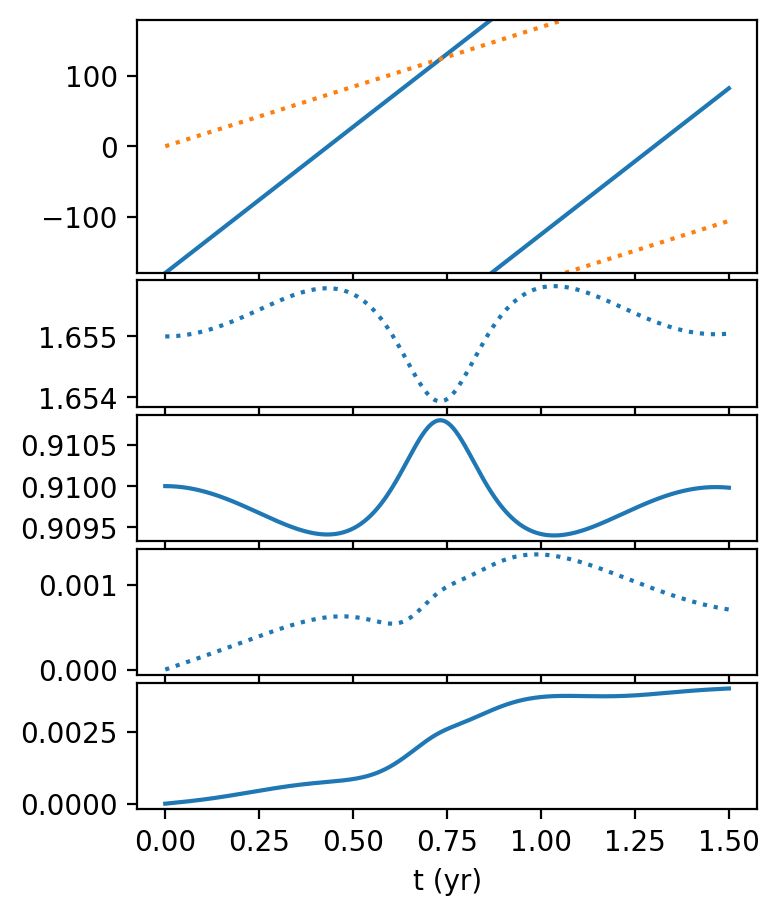

In [75]:
# Fig 2 - interaction over one orbit (see description in sec 3.2 of the PDF)
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=0.91, e=0)    # 1
sim.add(m=1e-3, a=1.655, e=0, l=np.pi)  # 2
sim.move_to_com()

simulate(1.5)

Initial period ratio =  2.4514220415206593


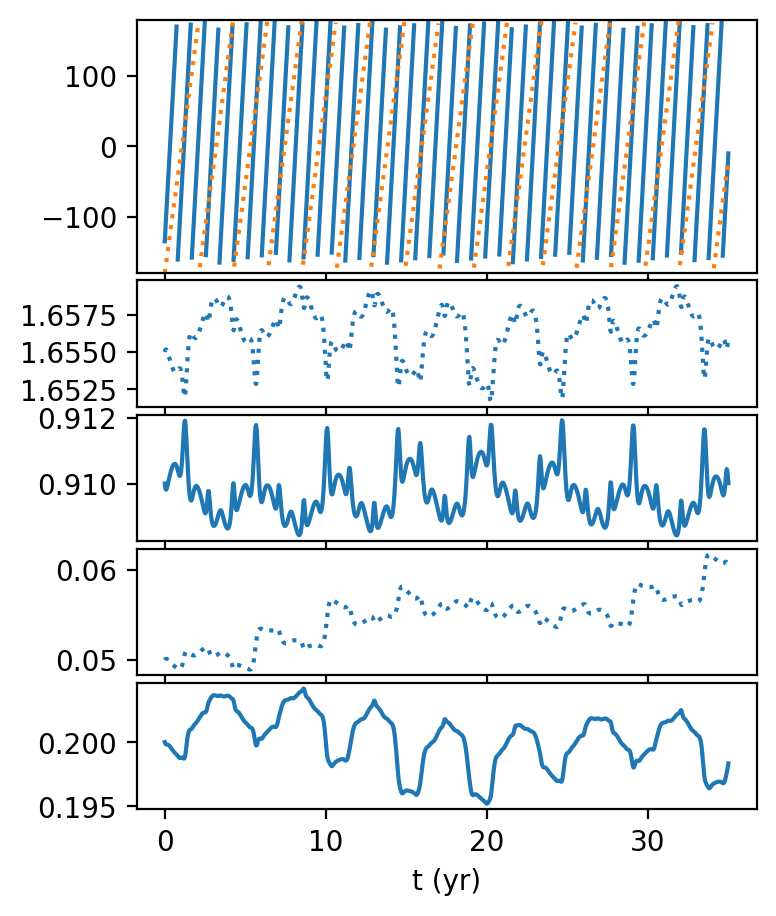

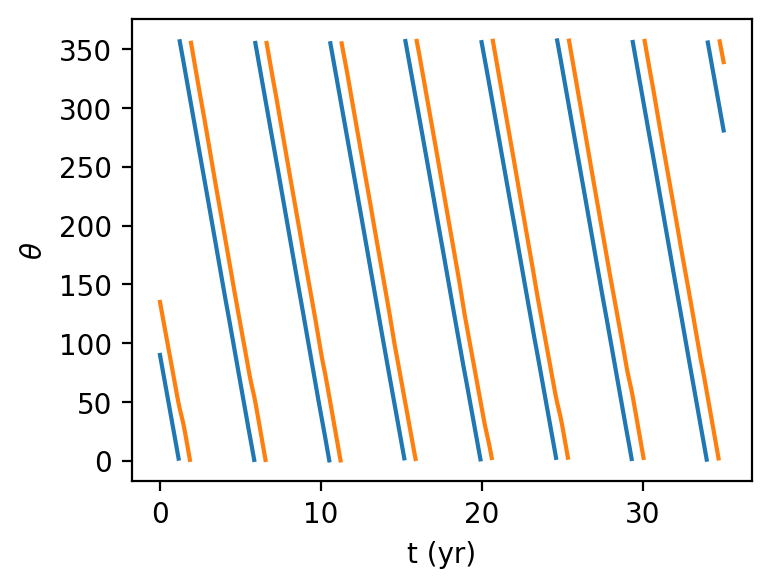

In [76]:
# Fig 3 - non-resonant period ratio
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=0.91, e=0.2, pomega=np.pi/4)    # 1
sim.add(m=1e-3, a=1.655, e=0.05)  # 2
sim.move_to_com()

simulate(35, plot_res_angle=True)

Initial period ratio =  2.00899675561506


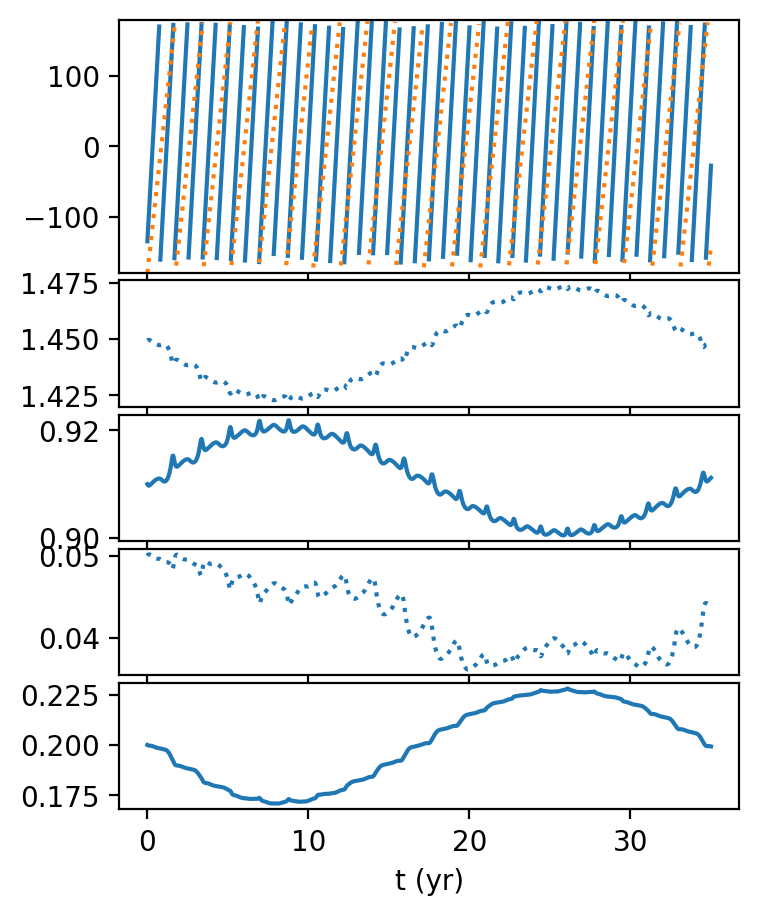

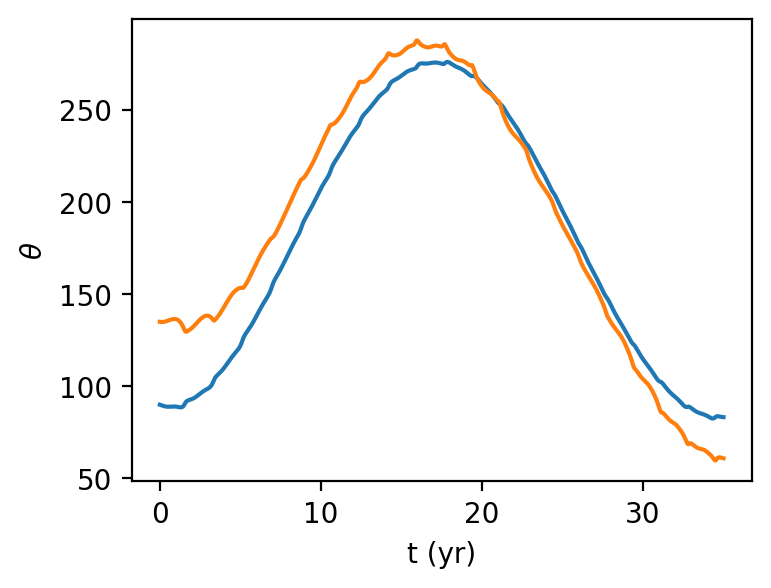

In [77]:
# Fig 4 - 2:1 resonance
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=0.91, e=0.2, pomega=np.pi/4)    # 1
sim.add(m=1e-3, a=0.91 * 2.01**(2/3), e=0.05)  # 2 - scale a\propto P^2/3 so that the period ratio is 2.01:1
sim.move_to_com()

simulate(35, plot_res_angle=True)

In [26]:
def simulate_kozai(tend):
    start = time.time()

    Noutputs = 1000
    times = np.linspace(0, tend, Noutputs)
    a1 = np.zeros(Noutputs)
    a2 = np.zeros(Noutputs)
    e1 = np.zeros(Noutputs)
    e2 = np.zeros(Noutputs)
    inc = np.zeros(Noutputs)
    
    for i,t in enumerate(times):
        sim.integrate(t, exact_finish_time=1)
        a1[i] = sim.orbits()[0].a
        e1[i] = sim.orbits()[0].e
        a2[i] = sim.orbits()[1].a
        e2[i] = sim.orbits()[1].e
        inc[i] = sim.orbits()[0].inc

    fig = plt.figure(figsize=(6,12))
    gs = GridSpec(nrows=6, ncols=1, height_ratios=[1, 1, 1, 1, 1, 1], hspace=0.1)

    axes = []
    for i in range(5):
        ax = fig.add_subplot(gs[i, 0], sharex=axes[0] if axes else None)
        axes.append(ax)

    axes[0].plot(times, np.rad2deg(inc))
    axes[0].set_ylabel(r'$i_p$')
    axes[1].plot(times, e1)
    axes[1].set_ylabel(r'$e_p$')
    axes[2].plot(times, a2, ":")
    axes[2].set_ylabel(r'$a_s$')
    axes[3].plot(times, a1)
    axes[3].set_ylabel(r'$a_p$')
    axes[4].plot(times, e2, ":")
    axes[4].set_ylabel(r'$e_s$')
    
    for ax in axes[:-1]:
        ax.tick_params(labelbottom=False)
    axes[-1].set_xlabel("t (yr)")

    plt.show()

    end = time.time()
    print('Time taken = %.2f s' % (end-start,))

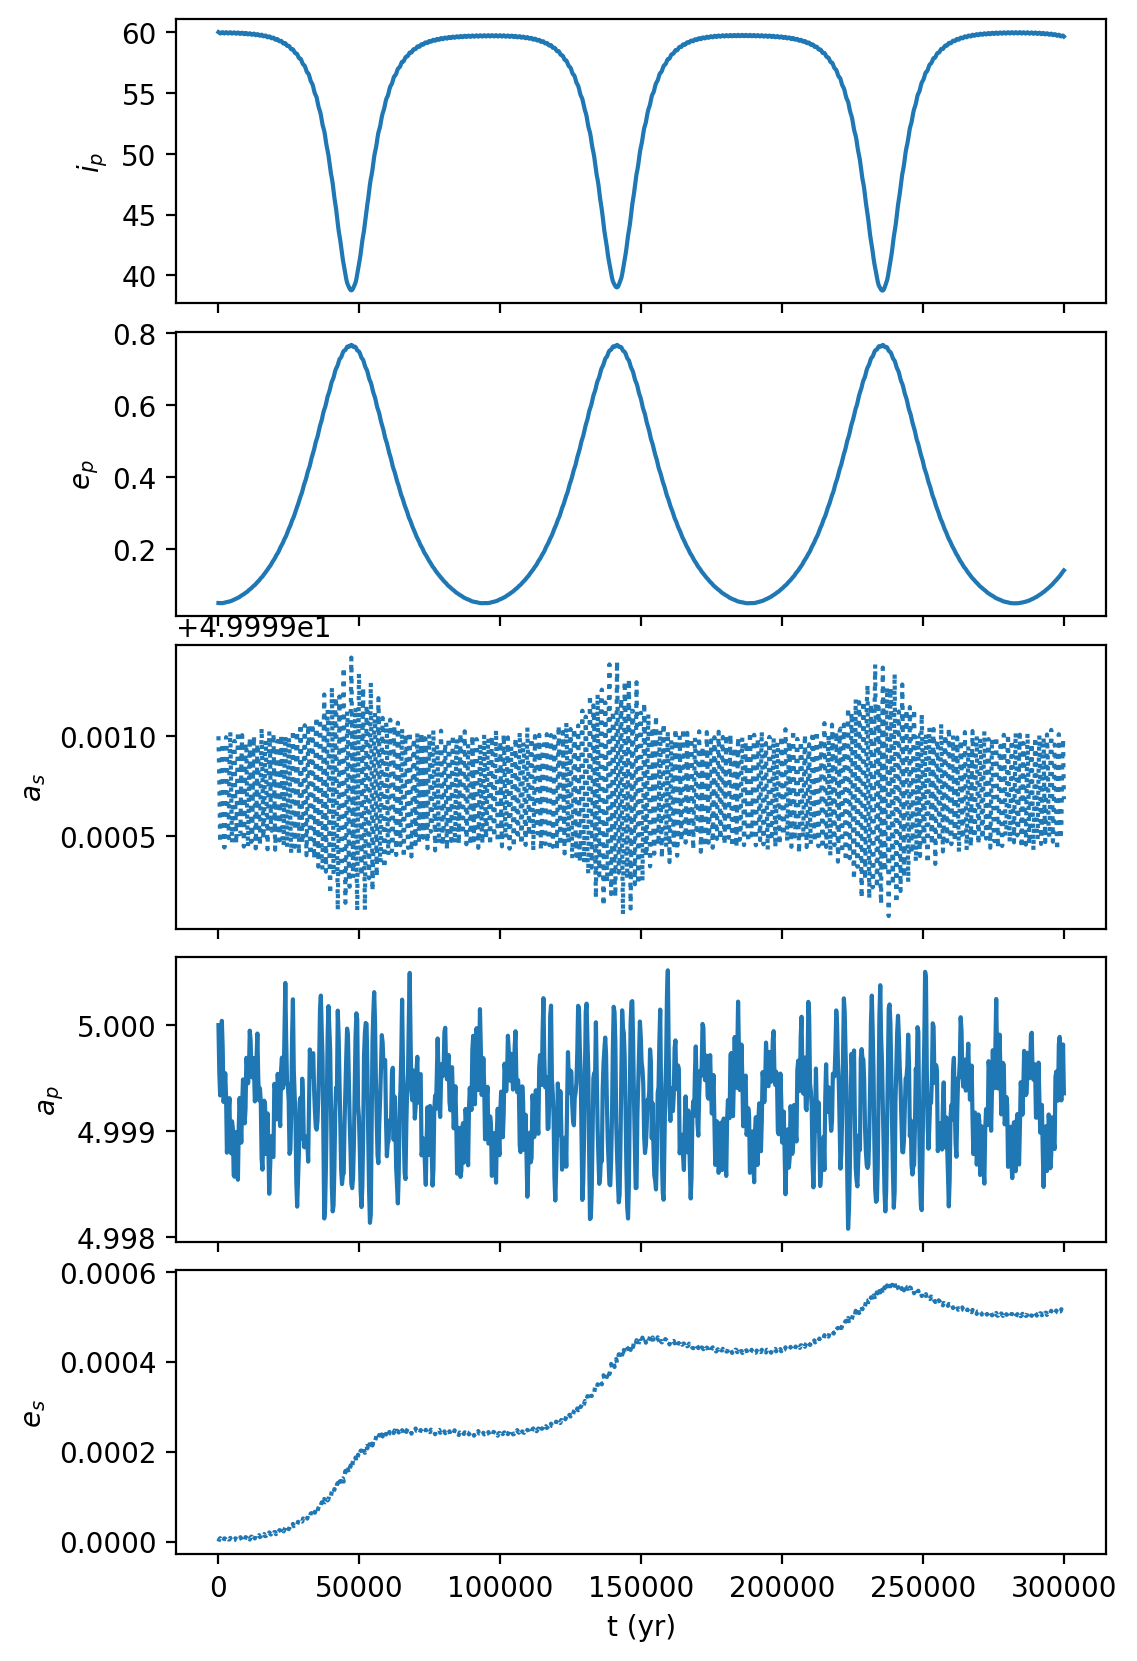

Time taken = 6.12 s


In [27]:
# Kozai example Fig 7.9
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=5, e=0.05, inc=np.deg2rad(60))    # Jupiter inclined initially at 60 degrees
sim.add(m=0.1, a=50, e=0, inc=np.deg2rad(0))  # secondary 
sim.move_to_com()

# run it for 300,000 years
simulate_kozai(3e5)

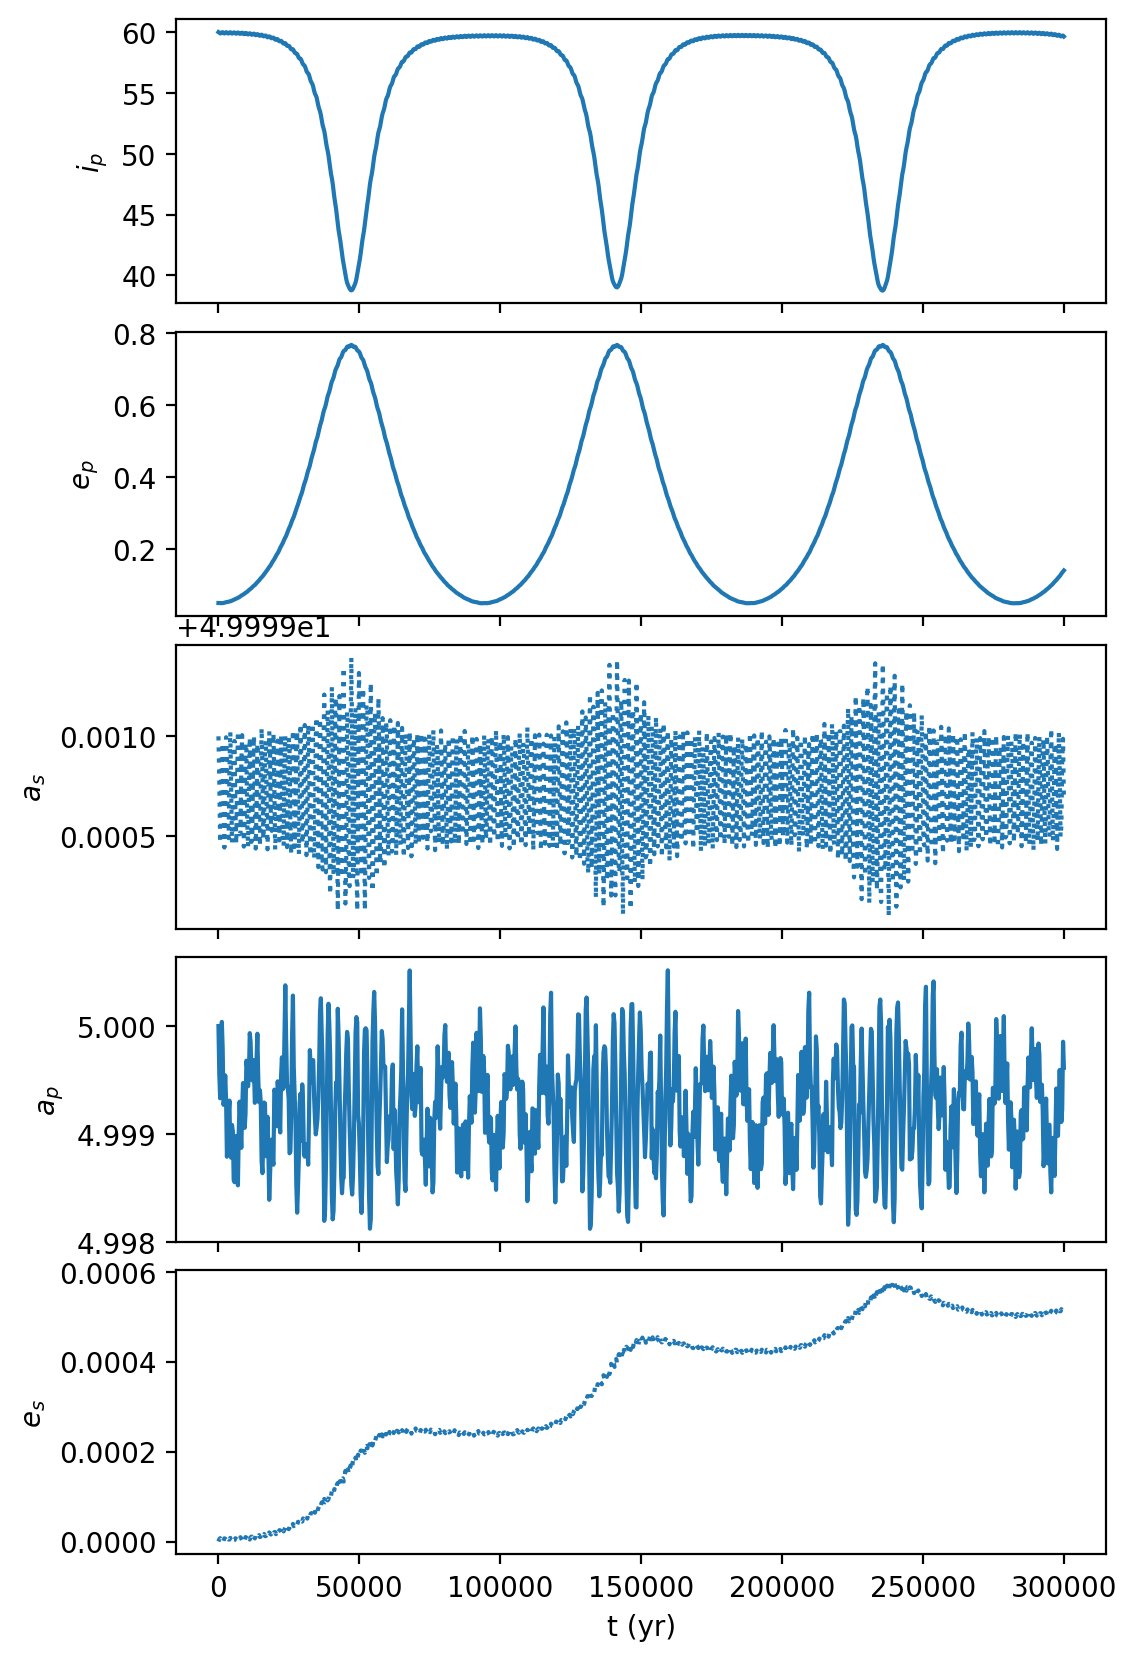

Time taken = 0.65 s


In [30]:
# Kozai example Fig 7.9 but with WHFast integrator
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=5, e=0.05, inc=np.deg2rad(60))    # Jupiter inclined initially at 60 degrees
sim.add(m=0.1, a=50, e=0, inc=np.deg2rad(0))  # secondary 
sim.move_to_com()
sim.integrator = 'WHFast'
sim.dt = 0.03 * 12   # few percent of Jupiter orbit ~ 12 years

# run it for 300,000 years
simulate_kozai(3e5)